# Assignment 2 Multivariate

# 1 Bivariate normal distribution for `polution.csv`

The data file `pollution.csv` (as on Canvas and SAS Studio) contains information on air pollution measurements. 
Using the file examine the pair of measurements
`X5=Nitrious Oxide` and
`X6=Ozone` 
for bivariate normality by completing the following: 

In [ ]:
/* Importing data */
Data pollutionData;
	infile "./data/pollution.csv" delimiter=","; 
	input x1-x4 NITRIOUSOXIDE OZONE x7;
	run;
    
proc iml;
use pollutionData;
read all var { NITRIOUSOXIDE OZONE } into pollution;

#### a) Calculate the distances of these observations from their means (2 marks)

In [ ]:
centrePollution=mean(pollution); /*calclate mean vector*/
covariancePollution=cov(pollution); /*calculate cov matrix*/
correlationPollution=corr(pollution); /*calculate correlation matrix*/
/* print centrePollution covariancePollution; */
columnVectorPollution = t(pollution-centrePollution); /* col vector */
distancesPollution = t(columnVectorPollution)*inv(covariancePollution)*columnVectorPollution; /* calculate distances */

In [ ]:
mahalaPollution=vecdiag(distancesPollution); /*produce Mahalanobis vector*/
print mahalaPollution; /*produce Mahalanobis vector */

#### b) Determine the proportion of the observations falling within the estimated `50% probability contour` of a bivariate normal distribution (1 mark)



Bivariate Contour to assess normality

(X<sub>i</sub> - X̄) S<sup>-1</sup> (X<sub>i</sub> - X̄)  ≤ χ2<sub>p</sub>(ɑ)

chisquared: χ2p(ɑ) -> χ2<sub>2</sub>(0.5) -> 1.39

In [4]:
pollutionInv = inv(covariancePollution);
pollutionMean = mean(pollution);
values=(pollution-pollutionMean)*pollutionInv*t(pollution-pollutionMean);
numbers=vecdiag(values);
inside=numbers<=1.39;
outside=numbers>1.39;
i_count=sum(inside);
o_count=sum(outside);
/* print i_count;
print o_count; */
proportion = i_count / (i_count + o_count);
print proportion;

proportion
0.6190476


#### c) Construct a chi-square plot of your distances from part a) above (2 marks)



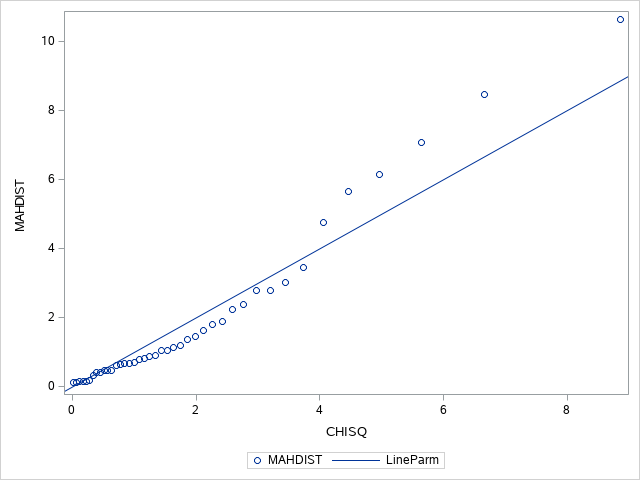

In [5]:
ranksPollution=rank(mahalaPollution); /*order distances*/
pPollution=ncol(pollution); /*number of columns*/
nPollution=nrow(pollution); /*number of rows*/
relativeFrequencyPollution=(ranksPollution-0.5)/nPollution; /* Compute the relative frequency */
chiSquaredPollution=cinv(relativeFrequencyPollution,pPollution); /* Quantile using Chi-square distribution with p degrees of freedom */
chiplot=mahalaPollution||chiSquaredPollution;
create chiplot from chiplot[colname={'MAHDIST' 'CHISQ'}]; /*create a dataset to plot*/
append from chiplot;
proc sgplot data=chiplot;
    scatter y=MAHDIST x=CHISQ;
    lineparm x=0 y=0 slope=1;
run;


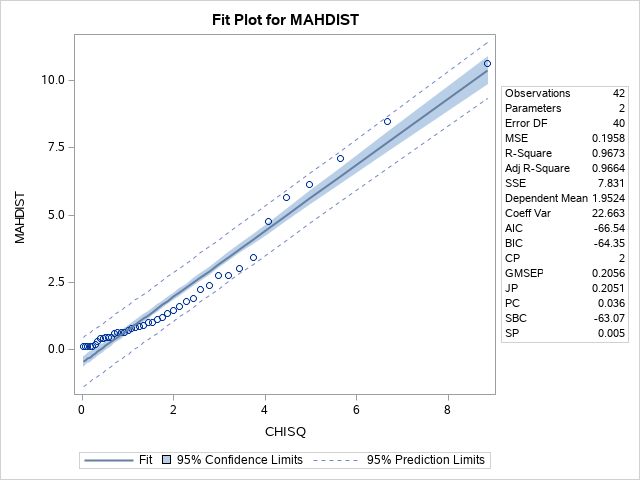

In [6]:
proc reg data=chiplot plots=FitPlot(stats=all);
  model MAHDIST = CHISQ;
  ods select FitPlot;
run;

#### d) Given your results in part b) and part c) are these data approximately bivariate normal? Explain

For bivariate normality we require:


- Multivariate normal distribution (formula) $\displaystyle \mathbf {X} \ \sim \ {\mathcal {N}}_{k}({\mu },\,{\boldsymbol {\Sigma }})$ with a single mean

- Representative Sample
- independence of observations

Given the Chi Squared Plot results.
And with only ~62% of the proportion falling within the estimated `50% probability contour` of a bivariate normal distribution.

- **Not bivariate normal**

##### Explain
- Because observation of qqplot and fit plot show two distinct curves
- Indicates either **bimodal** or light-tailed results
- $\displaystyle \mathbf {X} \ \sim \ {\mathcal {N}}_{k}({\boldsymbol {\mu }},\,{\Sigma })$ bimodal
- This is even though the results fit within the 95% CI (95%) according to observation of fit plot

see 3. multivariate normal sect 5 / 6 

# 2. Hypothesis testing - `results.csv`

In [7]:
/*read in data*/
Data temp;
infile "./data/results.csv" delimiter=","; 
input x1 x2 x3;
run;

proc IML;
use temp;
read all var _all_ into X;

The datafile `results.csv`, contains three test results assessing different types of intelligence. 

Test the following hypothesis at:

```
α=0.02
H0 :μ′=[85 75 55]
```
#### a) Conduct the hypothesis test showing all steps required. 

H<sub>0</sub>: μ' = μ<sub>0</sub>' = [85 75 55]<br/>
H<sub>a</sub>: μ' ≠ μ<sub>0</sub>' ≠ [85 75 55]

#### Which kind of test should we apply?



In [8]:
n=nrow(x); /* No. of observations */
p=ncol(x); /* No. of variables */
print n p;
/* n=nrow(typesOfIntelligence); /* No. of observations */ */
/* p=ncol(typesOfIntelligence); /* No. of variables */ */

n,p
80,3


Since n is relatively large, compared to p, we will use the `Large Sample Theory:` <p />
n(X̄<sub>n</sub> - μ)<sup>T</sup> S<sub>n</sub><sup>-1</sup> (X̄<sub>n</sub> - μ)  ≈ χ2<sub>p</sub>

#### Hypothesis:

H<sub>0</sub>: μ' = μ<sub>0</sub>' = [85 75 55]<br/>
H<sub>a</sub>: μ' ≠ μ<sub>0</sub>' ≠ [85 75 55]

#### Get critical value from Chi Squared table

χ2<sub>p</sub> = χ2(80, 0.02)  = 108.069	

#### Do maths to it

for μ<sub>0</sub>' = [85 75 55]<br/>

In [9]:
centre=t(mean(X));
cov_x=cov(X);
cor_x=corr(X);
incov=inv(cov_x); /* Inverse of the covariance matrix */
mu0={85,75,55}; /* Hypothesized values */


Large sample: <br />
n(X̄<sub>n</sub> - μ)<sup>T</sup> S<sub>n</sub><sup>-1</sup> (X̄<sub>n</sub> - μ)  ≈ χ2<sub>p</sub>

In [10]:
tsq=n*t(centre-mu0)*incov*(centre-mu0);
cCriticalValue=cinv(0.98,p);
print tsq cCriticalValue; */

tsq,cCriticalValue
51.308032,9.8374093


#### If the values given above are the average score for all college students over the last ten years, is there reason to believe the group in the datafile are scoring differently? Explain.(5 marks)

##### Hypothesis

H<sub>0</sub>: μ' = μ<sub>0</sub>' = [85 75 55]<br/>
H<sub>a</sub>: μ' ≠ μ<sub>0</sub>' ≠ [85 75 55]

##### Assumptions

$\displaystyle \mathbf {X} \ \sim \ {\mathcal {N}}_{k}({\boldsymbol {\mu }},\,{\boldsymbol {\Sigma }})$

- Representative
- Independence of observerations

We **reject** the null hypothesis because:

Reject if: T<sup>2</sup> > χ2<sub>p</sub>

T<sup>2</sup> > χ2<sub>p</sub>(α=0.02) <br />
51.3 > 9.837 <br />
∴ μ ≠ μ<sub>0</sub>

- The test score sample mean is sufficiently different during this year than the mean (μ' [85 75 55]) of uni students during previous years.

#### b) Determine the lengths and directions for the axes of the `90%` confidence ellipsoid for `μ` (2 marks)

notes from class
/*Compute the lengths of axes of the confidence ellipsoid*/
lam=eigval(cov_x); 
E=eigvec(cov_x);
length=2*sqrt(lam*ccri_90percent/n);
print length;
print E;

In [11]:
centre=t(mean(X));
cov_x=cov(X);
incov=inv(cov_x); /* Inverse of the covariance matrix */
mu0={85,75,55}; /* Hypothesized values */
cCriticalValue=cinv(0.98,p);

lambda=eigval(cov_x); 
direction_aka_Eigenvector=eigvec(cov_x);
length=2*sqrt(lambda*cCriticalValue/n);

print length;
print direction_aka_Eigenvector;

#### c) Construct the three possible scatter diagrams from the pairs of variables. 

In [12]:
sd=vecdiag(cov_x);
ubound1=centre+sqrt(cCriticalValue)*sqrt(sd/n);
lbound1=centre-sqrt(cCriticalValue)*sqrt(sd/n);
print lbound1 ubound1;

lbound1,ubound1
82.216049,89.433951
74.684939,85.190061
46.634609,53.215391



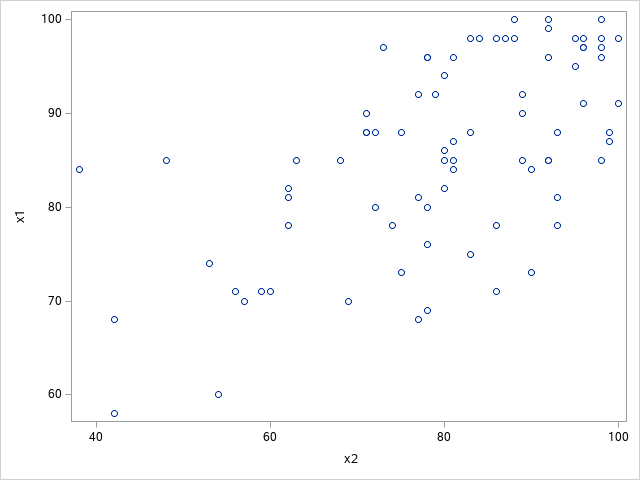

In [13]:
proc sgscatter data = temp;
PLOT X1 * X2; run;


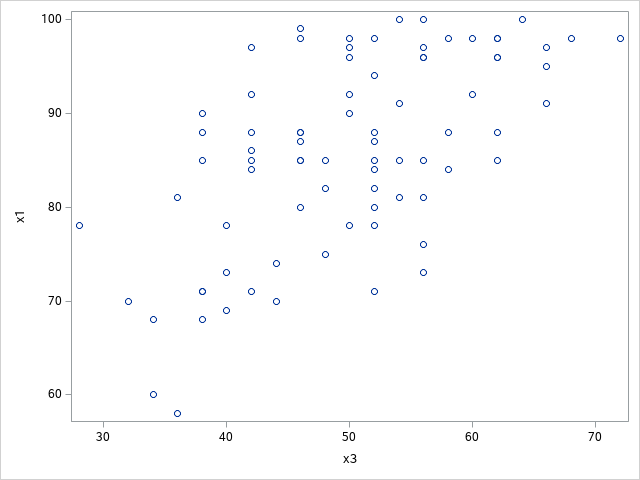

In [14]:
proc sgscatter data = temp;
PLOT X1 * X3; run;


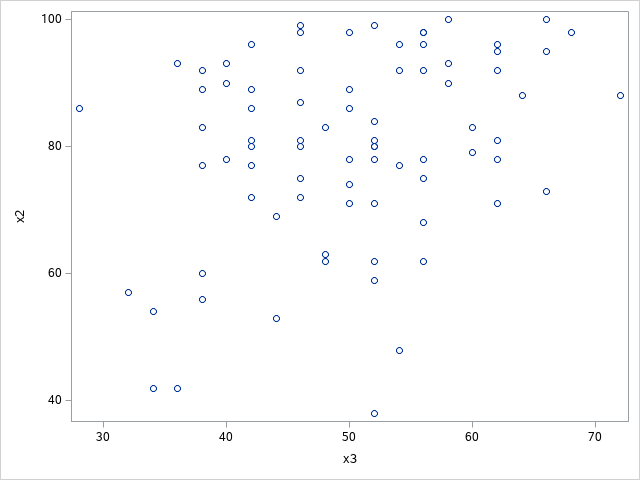

In [15]:
proc sgscatter data = temp;
PLOT X2 * X3; run;

#### Do these data appear to be normally distributed? 

Nope. This data does not appear to be normally distributed.

#### Discuss
(3 marks)

linear gradient = normally distributed

## Question 3

In [ ]:
proc iml;
/* reset print; */
dataQ3 = {
3 4 15 -6,
2 4 14 -7,
3 4 15 -5,
3 3 16 -6,
2 5 15 -7,
1 4 14 -4};

In [ ]:
nQ3=nrow(dataQ3); /* No. of observations */
pQ3=ncol(dataQ3); /* No. of variables */
alphaQ3 = 0.05;
muQ3 = mean(dataQ3);
degreesFreedomQ3 = nQ3 - 1;
mQ3 = pQ3;

covQ3=cov(dataQ3); /* covariance */
invCovQ3=inv(covQ3); /* Inverse of the covariance matrix - Might not need*/
sdQ3=vecdiag(CovQ3); /* get variance from diagonal of the covariance matrix */
sdQ3_T=T(vecdiag(CovQ3)); /* Transposed */

#### a) The independent 95 % confidence intervals for each variable (1.5 marks)

latex problematic formula hidden here: <!-- $\bar { { X }_{ i } } \pm \quad { t }_{ n-1,\quad 1-\alpha /2 }\left( \frac { \sigma  }{ \sqrt { n }  }  \right) \\ $ -->

In [ ]:
t_Q3 = tinv((1-(alphaQ3/2)), degreesFreedomQ3);

In [20]:
upperIndependentCIQ3 = muQ3 + t_Q3 * sdQ3_T/sqrt(nQ3);
lowerIndependentCIQ3 = muQ3 - t_Q3 * sdQ3_T/sqrt(nQ3);
independentConfidenceIntervalsQ3 = (lowerIndependentCIQ3`) || (upperIndependentCIQ3`);
print independentConfidenceIntervalsQ3[F=8.4 C={"Lower" "Upper"}];

#### b) The Bonferroni 95 % confidence intervals for each variable (1.5 marks)

latex problematic formula hidden here: <!-- $ \bar { { X }_{ i } } \pm \quad { t }_{ n-1 }\left( \frac { \alpha  }{ 2m }  \right) \sqrt { \cfrac { { s }_{ ii } }{ n }  } \\ $ -->

latex problematic formula hidden here: <!-- ${ t }_{ n-1 }\left( \frac { \alpha  }{ 2m }  \right) $ -->

In [ ]:
adjustedConfidenceIntervalQ3 = (1 - (alphaQ3 / (2 * mQ3)));
/* print adjustedConfidenceIntervalQ3; */

t(df, alpha) <- how we write it <br />
tinv(CI(aka 1-alpha), df) <- back to front

In [22]:
tCriticalValue=tinv(adjustedConfidenceIntervalQ3, degreesFreedomQ3);
/* print tCriticalValue; */

latex problematic formula hidden here: <!-- $
\sqrt { \cfrac { { s }_{ ii } }{ n }  } \\ $ -->

In [23]:
sdQ3=vecdiag(CovQ3); /* this gets the values along the diagonal of the covariance matrix */
sdQ3_T=T(vecdiag(CovQ3)); /* Transposed */

In [24]:
uboundQ3=muQ3+sqrt(tCriticalValue)*sqrt(sdQ3_T/nQ3);
lboundQ3=muQ3-sqrt(tCriticalValue)*sqrt(sdQ3_T/nQ3);
bonferroniConfidenceIntervalsQ3 = (lboundQ3`) || (uboundQ3`);
print bonferroniConfidenceIntervalsQ3[F=8.4 C={"Lower" "Upper"}];

c) The simultaneous 95 % confidence intervals for each variable (1.5 marks)

$\bar { { X }_{ i } } \pm \sqrt { _{ n-1 }\left( \frac { p(n-1) }{ n-p }  \right) { F }_{ p,n-p }(\alpha )\frac { { S }_{ ii } }{ n }  } $

In [25]:
firstPart = 1 - (nQ3 - pQ3) * alphaQ3;
tSquared = pQ3 * (nQ3 - 1)/(nQ3 - pQ3);
simultaneousCI = tinv(firstPart, degreesFreedomQ3);

upperSimultaneousCI = muQ3 + sqrt(tSquared * simultaneousCI) * sqrt(sdQ3_T / nQ3);
lowerSimultaneousCI = muQ3 - sqrt(tSquared * simultaneousCI) * sqrt(sdQ3_T / nQ3);

simultaneousConfidenceIntervalsQ3 = (lowerSimultaneousCI`) || (upperSimultaneousCI`);
print simultaneousConfidenceIntervalsQ3[F=8.4 C={"Lower" "Upper"}];


d) The 95 % confidence interval for the difference between μ2 and μ4. Are these means different? (1.5 marks)


In [26]:
muQ3X2 = mean(dataQ3[2]);
muQ3X4 = mean(dataQ3[4]);
diffXbar = (muQ3X2 - muQ3X4);
secondPartDiffEquation = sqrt(tSquared * sdQ3_T) * sqrt((covQ3[2,2] - 2 * covQ3[2,4] + covQ3[4,4]) / nQ3);

upperDiffCIMu2Mu4Q3 = diffXbar + secondPartDiffEquation;
lowerDiffCIMu2Mu4Q3 = diffXbar - secondPartDiffEquation;


diffCIMu2Mu4Q3 = (lowerDiffCIMu2Mu4Q3`) || (upperDiffCIMu2Mu4Q3`);
print diffCIMu2Mu4Q3[F=8.4 C={"Lower" "Upper"}];


/* The CI for μ2 - μ4 does not include zero, therefore the muQ3s are different */




e) Discuss the results from part a) to part d) above and explain any differences in the observed estimates. (2 marks)

In [27]:
muQ3_t = t(muQ3);
print muQ3_t independentConfidenceIntervalsQ3[F=8.4 C={"Lower" "Upper"}];

muQ3_t,independentConfidenceIntervalsQ3Lower,Upper
2.3333333,1.6337,3.0330
4,3.5802,4.4198
14.833333,14.2387,15.4280
-5.833333,-7.2676,-4.3991


## 4 PCA's with - `track.csv`
see other file for full SAS code for question 4 due to small bug with jupyter with SAS.
- The data file `track.csv` contains information on female national track records. <br />
Using the file completing the following:<br />


<code>%web_drop_table(R);
FILENAME REFFILE '/folders/myshortcuts/ass2--multivariate/data/track.csv';
PROC IMPORT DATAFILE=REFFILE 
	DBMS=CSV
	OUT=R; /* this is where we get the output with the PCA's */
	GETNAMES=YES;
RUN;
PROC CONTENTS DATA=R; 
RUN;
%web_open_table(R);
</code>

#### a) pt1 Obtain the sample correlation matrix R

<code>
proc IML;
proc princomp data=R OUT=prinR; 
     title3 '4 a) Obtain the sample correlation matrix R, and determine the eigenvalue/eigenvector pairs.';
run;

proc IML; /* fix printing error */
   *';*"; run;
proc iml;
title3 '4 b) pt1) State the first two principal components for the standardized variables';
print 'PCA1 Y1 = 0.377766X1 + 0.383210X2 + 0.368036X3 + 0.394781X4 + 0.389261X5 + 0.376094X6 + 0.355203X7';
print 'PCA2 Y2 = -0.407176X1 - 0.413629X2 - 0.459353X3 + 0.161246X4 + 0.309088X5 + 0.423190X6 + 0.389215X7';
run;
</code>

| _100m__s_ | _200m__s_ | _400m__s_ | _800m__min_ | _1500m__min_ | _3000m__min_ | Marathon__min_ |  |
| --- | --- | --- | --- | --- | --- | --- | --- |
| _100m__s_ | 1.0000 | 0.9411 | 0.8708 | 0.8092 | 0.7816 | 0.7279 | 0.6690 |
| _200m__s_ | 0.9411 | 1.0000 | 0.9088 | 0.8198 | 0.8013 | 0.7319 | 0.6800 |
| _400m__s_ | 0.8708 | 0.9088 | 1.0000 | 0.8058 | 0.7198 | 0.6738 | 0.6769 |
| _800m__min_ | 0.8092 | 0.8198 | 0.8058 | 1.0000 | 0.9051 | 0.8666 | 0.8540 |
| _1500m__min_ | 0.7816 | 0.8013 | 0.7198 | 0.9051 | 1.0000 | 0.9734 | 0.7906 |
| _3000m__min_ | 0.7279 | 0.7319 | 0.6738 | 0.8666 | 0.9734 | 1.0000 | 0.7987 |
| Marathon__min_ | 0.6690 | 0.6800 | 0.6769 | 0.8540 | 0.7906 | 0.7987 | 1.0000 |


#### a) pt2 determine the eigenvalue/eigenvector pairs.

|  |  | Eigenvalue | Eigen - Prin1 | Eigen - Prin2 | Eigen - Prin3 | Eigen - Prin4 | Eigen - Prin5 | Eigen - Prin6 | Eigen - Prin7 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| x1 | _100m__s_ | **5.80762446** | 0.377766 | -.407176 | -.140580 | 0.587063 | -.167069 | 0.539697 | -.088939 |
| x2 | _200m__s_ | **0.62869342** | 0.383210 | -.413629 | -.100783 | 0.194075 | 0.093500 | -.744931 | 0.265657 |
| x3 | _400m__s_ | **0.27933457** | 0.368036 | -.459353 | 0.237026 | -.645431 | 0.327273 | 0.240094 | -.126604 |
| x4 | _800m__min_ | **0.12455472** | 0.394781 | 0.161246 | 0.147542 | -.295208 | -.819055 | -.016507 | 0.195213 |
| x5 | _1500m__min_ | **0.09097174** | 0.389261 | 0.309088 | -.421986 | -.066690 | 0.026131 | -.188988 | -.730768 |
| x6 | _3000m__min_ | **0.05451882** | 0.376094 | 0.423190 | -.406063 | -.080157 | 0.351698 | 0.240500 | 0.571506 |
| x7 | Marathon__min_ | **0.01430226** | 0.355203 | 0.389215 | 0.741061 | 0.321076 | 0.247008 | -.048270 | -.082084 |

#### b) State the first two principal components for the standardized variables

- PCA1 Y1 = 0.377766X1 + 0.383210X2 + 0.368036X3 + 0.394781X4 + 0.389261X5 + 0.376094X6 + 0.355203X7 <p />
- PCA2 Y2 = -0.407176X1 - 0.413629X2 - 0.459353X3 + 0.161246X4 + 0.309088X5 + 0.423190X6 + 0.389215X7

<code>
data Cumulative;
length CumulativePercent 	&#36; 2;
input X &#36;1-15 Eigenvalue &#36;1-15 CumulativePercentCol;
CumulativePercent = substr(X,1,2);
datalines;
X   Eigenvalue  Cumulative 
X1  5.80762446  82.97
X2  0.62869342  91.95
X3  0.27933457  95.94
X4  0.12455472  97.72
X5  0.09097174  99.02
X6  0.05451882  99.80
X7  0.01430226  100.00
;
proc print data=Cumulative;
title3 '4 b) pt2. Calculate the cumulative percentages of the total (standardized) sample variance explained.';
run;
</code>

#### b) pt2. calculate the cumulative percentages of the total (standardized) sample variance explained. (2 marks)

| PCA | Eigenvalue | CumulativePercent |
| --- | --- | --- |
| X1 | 5.80762446 | 82.97 |
| X2 | 0.62869342 | 91.95 |
| X3 | 0.27933457 | 95.94 |
| X4 | 0.12455472 | 97.72 |
| X5 | 0.09097174 | 99.02 |
| X6 | 0.05451882 | 99.80 |
| X7 | 0.01430226 | 100.00 |

#### c) Prepare a table showing the correlation of the standardized variables with the first two components.

<code>
proc princomp data=R n=2 outstat=standardVariablesCorr noprint;
run;
proc print data = standardVariablesCorr;
	title3 "c) Prepare a table showing the correlation of the standardized variables with the first two components.";
 	where _TYPE_ = 'SCORE';
run;

/* proc print data=R; */
/* run;  */
/* proc print data=prinR; */
/* run;  */

proc print data=prinR;
var Country Prin1 Prin2; /* filter to only display country and first Principle Component
run; 
</code>

| PCA | _100m__s_ | _200m__s_ | _400m__s_ | _800m__min_ | _1500m__min_ | _3000m__min_ | Marathon__min_ |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Prin1 | 0.37777 | 0.38321 | 0.36804 | 0.39478 | 0.38926 | 0.37609 | 0.35520 |
| Prin2 | -0.40718 | -0.41363 | -0.45935 | 0.16125 | 0.30909 | 0.42319 | 0.38922 |


#### d) Interpret the two principal components from Part b). (2 marks) (3 marks)

- The first principle component accounts for ~82.97% of female national track records
- Second principle component accounts for an additonal ~8.98% of female national track records
- The dataset can be reduced to 2 principle components to explain ~91.95% of female national track records.

#### e) Rank the nations based on their score on the first principal component. 

<code>
proc sort data=prinR; /* rank by principle component #1 */ 
by Prin1; run;
proc print data=prinR;
var Country Prin1; /* filter to only display country and first Principle Component */
title 'e) Rank the nations based on their score on the first principal component'; 
run;
</code>

| Obs | Country | Prin1 |
| --- | --- | --- |
| 1 | ARG | 0.39324 |
| 2 | AUS | -1.93164 |
| 3 | AUT | -1.26252 |
| 4 | BEL | -1.29173 |
| 5 | BER | 1.39611 |
| 6 | BRA | -1.00678 |
| 7 | CAN | -1.73434 |
| 8 | CHI | 0.81184 |
| 9 | CHN | -2.98947 |
| 10 | COL | 0.00193 |
| 11 | COK | 7.90623 |
| 12 | CRC | 2.16681 |
| 13 | CZE | -2.40603 |
| 14 | DEN | -0.08250 |
| 15 | DOM | 2.19241 |
| 16 | FIN | -1.26673 |
| 17 | FRA | -2.51835 |
| 18 | GER | -3.04752 |
| 19 | GBR | -2.44271 |
| 20 | GRE | -1.19780 |
| 21 | GUA | 3.29412 |
| 22 | HUN | -0.78825 |
| 23 | INA | 1.74194 |
| 24 | IND | -0.35426 |
| 25 | IRL | -1.03591 |
| 26 | ISR | 0.57416 |
| 27 | ITA | -1.54745 |
| 28 | JPN | -0.48166 |
| 29 | KEN | -0.91774 |
| 30 | KOR | 0.83079 |
| 31 | KOR | 1.45535 |
| 32 | LUX | 1.72147 |
| 33 | MAS | 1.49521 |
| 34 | MRI | 1.74973 |
| 35 | MEX | -0.99577 |
| 36 | MYA | 0.81598 |
| 37 | NED | -1.54476 |
| 38 | NZL | -0.75524 |
| 39 | NOR | -0.55300 |
| 40 | PNG | 5.25745 |
| 41 | PHI | 1.76353 |
| 42 | POL | -2.27377 |
| 43 | POR | -1.17525 |
| 44 | ROM | -2.12301 |
| 45 | RUS | -3.04295 |
| 46 | SAM | 8.21342 |
| 47 | SIN | 3.09392 |
| 48 | ESP | -1.88946 |
| 49 | SWE | -0.83915 |
| 50 | SUI | -1.11355 |
| 51 | TPE | 0.65909 |
| 52 | THA | 1.22381 |
| 53 | TUR | -0.85013 |
| 54 | USA | -3.29915 |


#### Discuss whether this meets your expectations. (2 marks)

Doesn't meet my expectations because current world records for track records are:

- Women's records are from USA, France, Soviet, Romania, Kenya, Ethiopia
- Men all from Africa (Jamaica, South Africa, Kenya, Ethiopia)

Possibly because date of the records isn't supplied.
Further investigation could compare current world records accross all countries

##### Ranked by Principle Component 1 (accross all track records)

| Obs | Country | Prin1 |
| --- | --- | --- |
| 1 | ARG | 0.39324 |
| 2 | AUS | -1.93164 |
| 3 | AUT | -1.26252 |
| 4 | BEL | -1.29173 |
| 5 | BER | 1.39611 |
| 6 | BRA | -1.00678 |
| 7 | CAN | -1.73434 |
| 8 | CHI | 0.81184 |
| 9 | CHN | -2.98947 |
| 10 | COL | 0.00193 |


##### [Men's records]

||||
| --- | --- | --- | --- |
| 100 metres | 0:9.63 | Usain Bolt | Jamaica |
| 200 metres | 0:19.30 | Usain Bolt | Jamaica |
| 400 metres | 0:43.03 | Wayde van Niekerk | South Africa |
| 800 metres | 1:40.91 | David Rudisha | Kenya |
| 1500 metres | 3:32.07 | Noah Ngeny | Kenya |
| 5000 metres | 12:57.82 | Kenenisa Bekele | Ethiopia |
| 10000 metre | 27:01.17 | Kenenisa Bekele | Ethiopia |
| Marathon | 2:06:32 | Samuel Wanjiru | Kenya |

##### [Women's records]

||||
| --- | --- | --- | --- |
| 100 metres | 10.62 | Florence Griffith-Joyner | United States (USA) |
| 200 metres | 21.34 | Florence Griffith-Joyner | United States (USA) |
| 400 metres | 48.25 | Marie-José Pérec | France (FRA) |
| 800 metres | 1:53.43 | Nadezhda Olizarenko | Soviet Union (URS) |
| 1,500 metres | 3:53.96 | Paula Ivan | Romania (ROU) |
| 5,000 metres | 14:26.17 | Vivian Cheruiyot | Kenya (KEN) |
| 10,000 metres | 29:17.45 | Almaz Ayana | Ethiopia (ETH) |
| Marathon | 2:23:07 | Tiki Gelana | Ethiopia (ETH) |





[Women's records]: https://en.wikipedia.org/wiki/List_of_Olympic_records_in_athletics#Women's_records
[Men's records]: https://en.wikipedia.org/wiki/List_of_Olympic_records_in_athletics#Men's_records


## 5 - Factor Analysis

The correlation matrix below is from the measurement of skeletal features of white leghorn fowl (Dunn, Storrs Agricultural Experimental Station Bulletin, 52, 1928). Where

X<sub>1</sub> = Skull length<br />
X<sub>2</sub> = Skull breadth <br />
X<sub>3</sub> = Femur length <br />
X<sub>4</sub> = Tibia length <br />
X<sub>5</sub> = Humerus length  <br />
X<sub>6</sub> = Ulna length <br />

Using the **maximum likelihood procedure** the following estimated factor loadings were extracted:

| Skeletal Feature | Variable | Estimated- | -Loadings | Varimax- | -rotated-loadings |
| --- | --- | --- | --- | --- | --- |
|  | | F1 | F2 | F1* | F2* |
| Skull length | 1 | 0.602 | 0.200 | 0.484 | 0.411 |
| Skull breadth | 2 | 0.467 | 0.154 | 0.375 | 0.319 |
| Femur length | 3 | 0.926 | 0.143 | 0.603 | 0.717 |
| Tibia length | 4 | 1.000 | 0.000 | 0.519 | 0.855 |
| Humerus length | 5 | 0.874 | 0.476 | 0.861 | 0.499 |
| Ulna length | 6 | 0.894 | 0.327 | 0.744 | 0.594 |


| Skeletal Feature | Variable | Estimated- | -Loadings |  |  | Varimax- | -rotated-loadings |  |  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|  |  | F1 | F1 Proportions | F2 | F2 Proportions | F1* | F1*Proportions | F2* | F2*Proportions |
| Skull length | 1 | 0.602 | 0.1263909 | 0.200 | 0.0419903 | 0.484 | 0.134969325 | 0.411 | 0.121060383 |
| Skull breadth | 2 | 0.467 | 0.0980474 | 0.154 | 0.0323326 | 0.375 | 0.104573341 | 0.319 | 0.093961708 |
| Femur length | 3 | 0.926 | 0.1944153 | 0.143 | 0.0300231 | 0.603 | 0.168153932 | 0.717 | 0.211192931 |
| Tibia length | 4 | 1.000 | 0.2099517 | 0.000 | 0 | 0.519 | 0.144729504 | 0.855 | 0.251840943 |
| Humerus length | 5 | 0.874 | 0.1834978 | 0.476 | 0.099937 | 0.861 | 0.24010039 | 0.499 | 0.146980854 |
| Ulna length | 6 | 0.894 | 0.1876968 | 0.327 | 0.0686542 | 0.744 | 0.207473508 | 0.594 | 0.174963181 |
| **Totals** |  | 4.763 |  | 1.3 |  | 3.586 |  | 3.395 |  |

In [28]:
proc iml;
fowlCorr = {
1.000 0.505 0.569 0.602 0.621 0.603,
0.505 1.000 0.422 0.467 0.482 0.450,
0.569 0.422 1.000 0.926 0.877 0.878,
0.602 0.467 0.926 1.000 0.874 0.894,
0.621 0.482 0.877 0.874 1.000 0.937,
0.603 0.450 0.878 0.894 0.937 1.000
};

In [29]:
/* data fowl (type=cov);
input _type_$ x1-x6;
datalines;
corr 1.000 0.505 0.569 0.602 0.621 0.603
corr 0.505 1.000 0.422 0.467 0.482 0.450
corr 0.569 0.422 1.000 0.926 0.877 0.878
corr 0.602 0.467 0.926 1.000 0.874 0.894
corr 0.621 0.482 0.877 0.874 1.000 0.937
corr 0.603 0.450 0.878 0.894 0.937 1.000
;

proc factor data=fowl method=principal corr p=80;

/* proc factor data=fowl method=principal cov rotate=varimax; */
run; */

### d) Using the **unrotated estimated factor** loadings, obtain the maximum likelihood estimates of the following:

#### i. The specific variances. $\hat { \psi  } $

In [30]:
proc iml;
fowlCorr = {
1.000 0.505 0.569 0.602 0.621 0.603,
0.505 1.000 0.422 0.467 0.482 0.450,
0.569 0.422 1.000 0.926 0.877 0.878,
0.602 0.467 0.926 1.000 0.874 0.894,
0.621 0.482 0.877 0.874 1.000 0.937,
0.603 0.450 0.878 0.894 0.937 1.000
};
estimatedFactorLoading = {
0.602 0.200,
0.467 0.154,
0.926 0.143,
1.000 0.000,
0.874 0.476,
0.894 0.327
};
estimatedFactorLoadingT = t(estimatedFactorLoading);
LLt = estimatedFactorLoading * estimatedFactorLoadingT;

psiWithoutZeros = fowlCorr - LLt;
psi = diag(psiWithoutZeros);
psiFowlEstimated = vecdiag(psi);
fowlCorrEstimated = LLt + psi;
redisualMatrixEstimated = fowlCorr - LLt - psi;

communalitiesFowlEstimated = vecDiag(1 - psi);
print psiFowlEstimated;
print fowlCorrEstimated;
print fowlCorr;

#### ii. The communalities.  $ { h }_{ i }^{ 2 } = 1 -{ \psi  }_{ i }$

In [31]:
print communalitiesFowlEstimated;

communalitiesFowlEstimated
0.402404
0.241805
0.877925
1
0.990452
0.906165


#### iii. The proportion of variance explained by each factor. 

**Estimated-Loadings**

| Skeletal Feature | Variable | |  |  |  |
| --- | --- | --- | --- | --- | --- |
|  |  | F1 | F1 Proportions | F2 | F2 Proportions |
| Skull length | x<sub>1</sub> | 0.602 | 0.1263909 | 0.200 | 0.0419903 |
| Skull breadth | x<sub>2</sub> | 0.467 | 0.0980474 | 0.154 | 0.0323326 |
| Femur length | x<sub>3</sub> | 0.926 | 0.1944153 | 0.143 | 0.0300231 |
| Tibia length | x<sub>4</sub> | 1.000 | 0.2099517 | 0.000 | 0 |
| Humerus length | x<sub>5</sub> | 0.874 | 0.1834978 | 0.476 | 0.099937 |
| Ulna length | x<sub>6</sub> | 0.894 | 0.1876968 | 0.327 | 0.0686542 |
| **Totals** |  | **4.763** |  | **1.300** |  |


#### iv. The residual matrix (2.5 marks)

$R-\widehat { L } \widehat { L } -\hat { \psi  } $

In [32]:
print redisualMatrixEstimated;

#### e) Using the varimax rotated estimated factor loadings, obtain the maximum likelihood estimates of the following:

#### i. The specific variances. 

In [33]:
proc iml;
fowlCorr = {
1.000 0.505 0.569 0.602 0.621 0.603,
0.505 1.000 0.422 0.467 0.482 0.450,
0.569 0.422 1.000 0.926 0.877 0.878,
0.602 0.467 0.926 1.000 0.874 0.894,
0.621 0.482 0.877 0.874 1.000 0.937,
0.603 0.450 0.878 0.894 0.937 1.000
};

VarimaxRotated = {
0.484 0.411,
0.375 0.319,
0.603 0.717,
0.519 0.855,
0.861 0.499,
0.744 0.594
};

redisualMatrixEstimated = {
0 0.193066 -0.017052 0 -0.000348 -0.000588,
0.193066 0 -0.032464 0 0.000538 -0.017856,
-0.017052 -0.032464 0 0 -0.000392 0.003395,
0 0 0 0 0 0,
-0.000348 0.000538 -0.000392 0 0 -8E-6,
-0.000588 -0.017856 0.003395 0 -8E-6 0 
};

VarimaxRotatedT = t(VarimaxRotated);
LLt = VarimaxRotated * VarimaxRotatedT;

psiWithoutZeros = fowlCorr - LLt;
psi = diag(psiWithoutZeros);
psiFowlVarimax = vecdiag(psi);
fowlCorrSample = LLt + psi;
redisualMatrixRotated = fowlCorr - LLt - psi;

residualMatrixDiff = redisualMatrixEstimated - redisualMatrixRotated;

communalitiesFowlVarimax = vecDiag(1 - psi);
print psiFowlVarimax;
print fowlCorrSample;
print fowlCorr;

#### ii. The communalities.

In [34]:
print communalitiesFowlVarimax;

communalitiesFowlVarimax
0.403177
0.242386
0.877698
1.000386
0.990322
0.906372


#### iii. The proportion of variance explained by each factor. 


#### Varimax-rotated-loadings

|  |  |  |  |  |  |
| --- | --- | --- | --- | --- | --- |
|  |  | F1* | F1*Proportions | F2* | F2*Proportions |
| Skull length | 1 | 0.484 | 0.134969325 | 0.411 | 0.121060383 |
| Skull breadth | 2 | 0.375 | 0.104573341 | 0.319 | 0.093961708 |
| Femur length | 3 | 0.603 | 0.168153932 | 0.717 | 0.211192931 |
| Tibia length | 4 | 0.519 | 0.144729504 | 0.855 | 0.251840943 |
| Humerus length | 5 | 0.861 | 0.24010039 | 0.499 | 0.146980854 |
| Ulna length | 6 | 0.744 | 0.207473508 | 0.594 | 0.174963181 |
| **Totals** |  | 3.586 |  | 3.395 |  |


#### iv. Theresidualmatrix  $R-\widehat { L } \widehat { L } -\hat { \psi  } $ (2.5 marks)


In [35]:
print redisualMatrixRotated;

#### f) Comment on the results using the two loading methods by comparing your results from  part a) and part b) above. (2 marks)

Rotating the residual matrix 

Everything appears to be quite similar, except for [2,1] in our corrolation matrix:

- Estimated loading  0.311934
- Varimax rotated    0.312609
- Corrolation matrix 0.505

Which seems to be slightly different based on our sample.


In [36]:
print residualMatrixDiff;

It's not obvious with the estimated loadings what is explained by F1, and F2 in the estimated loading

Ie.
F1 => mostly explained by Tibia, Femur, Ulna, Humerous, each ~20%
F2 => mostly explained by Ulna (0.07~)

Rotated is much easier to understand:

F1 => Mostly explained by Humerus (24%), Ulna (20.7%), Femur (17%)
F2 => Mostly explained by Tibia (25%), Femur(21%), Ulna (17%)

There is no part a) or part b)

Not rotated very far
rotating moves this away from psi of 0 and communality of 1
So psi[4] for Varimax gets rotated to -0.000386

<pre>
psiFowlEstimated
0.597596
0.758195
0.122075
0                 this is strange
0.009548
0.093835

communalitiesFowlEstimated
0.402404
0.241805
0.877925
1                 this is strange
0.990452
0.906165

psiFowlVarimax
0.596823
0.757614
0.122302
-0.000386
0.009678
0.093628

communalitiesFowlVarimax
0.403177
0.242386
0.877698
1.000386
0.990322
0.906372
</pre>
